In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/occupancy.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [3]:
df['date']

0        2/2/2015 14:00
1        2/2/2015 15:00
2        2/2/2015 16:00
3        2/2/2015 17:00
4        2/2/2015 18:00
             ...       
2659     5/24/2015 9:00
2660    5/24/2015 10:00
2661    5/24/2015 11:00
2662    5/24/2015 12:00
2663    5/24/2015 13:00
Name: date, Length: 2664, dtype: object

### Declaring the date variable as a datetime object

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0      2015-02-02 14:00:00
1      2015-02-02 15:00:00
2      2015-02-02 16:00:00
3      2015-02-02 17:00:00
4      2015-02-02 18:00:00
               ...        
2659   2015-05-24 09:00:00
2660   2015-05-24 10:00:00
2661   2015-05-24 11:00:00
2662   2015-05-24 12:00:00
2663   2015-05-24 13:00:00
Name: date, Length: 2664, dtype: datetime64[ns]

In [5]:
print(pd.to_datetime("4th of July, 2015"))
print(pd.to_datetime("Nov 9 2001"))
print(pd.to_datetime("February 2nd 2019 15:32"))

2015-07-04 00:00:00
2001-11-09 00:00:00
2019-02-02 15:32:00


Formatting options for datetime objects: https://strftime.org/

In [6]:
# use the website above to get more coll stuff about date.

In [7]:
pd.to_datetime("February 2nd 2019 15:32").strftime('%B')


'February'

In [8]:
pd.to_datetime("February 2nd 2019 15:32").strftime('%c')

'Sat Feb  2 15:32:00 2019'

### Setting a time index

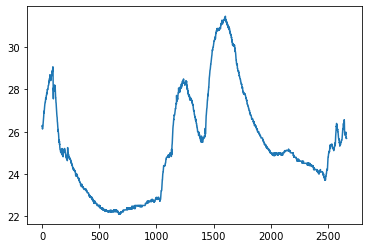

In [9]:
# Without the date index
# resizing all of the plots: 
# plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(df['Humidity'])

In [10]:
df.index

RangeIndex(start=0, stop=2664, step=1)

In [11]:
# this is to make 'date' to be the index of the data frame:
df.index = pd.DatetimeIndex(df['date'], freq='H') # frequncy is hourly. 
df.index

DatetimeIndex(['2015-02-02 14:00:00', '2015-02-02 15:00:00',
               '2015-02-02 16:00:00', '2015-02-02 17:00:00',
               '2015-02-02 18:00:00', '2015-02-02 19:00:00',
               '2015-02-02 20:00:00', '2015-02-02 21:00:00',
               '2015-02-02 22:00:00', '2015-02-02 23:00:00',
               ...
               '2015-05-24 04:00:00', '2015-05-24 05:00:00',
               '2015-05-24 06:00:00', '2015-05-24 07:00:00',
               '2015-05-24 08:00:00', '2015-05-24 09:00:00',
               '2015-05-24 10:00:00', '2015-05-24 11:00:00',
               '2015-05-24 12:00:00', '2015-05-24 13:00:00'],
              dtype='datetime64[ns]', name='date', length=2664, freq='H')

In [12]:
#df.head()

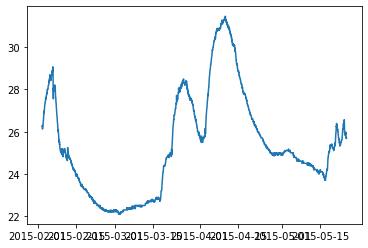

In [13]:
plt.plot(df['Humidity'])
plt.rcParams['figure.figsize'] = (12, 6)
# this command makes all the figures in this kernel the size that we want. 


### Changing the frequency of the data (Resampling)

In [14]:
df['Humidity'].resample('W').mean()
# this is to get the mean of weekly humidity

date
2015-02-08    27.529601
2015-02-15    24.591775
2015-02-22    23.049012
2015-03-01    22.288259
2015-03-08    22.308055
2015-03-15    22.601635
2015-03-22    24.315943
2015-03-29    27.812716
2015-04-05    26.966913
2015-04-12    30.874330
2015-04-19    28.281236
2015-04-26    25.749650
2015-05-03    24.996242
2015-05-10    24.668289
2015-05-17    24.174230
2015-05-24    25.638685
Freq: W-SUN, Name: Humidity, dtype: float64

In [15]:
#help(df.resample)

Options for resampling frequency:
    
- B       business day frequency
- C       custom business day frequency (experimental)
- D       calendar day frequency
- W       weekly frequency
- M       month end frequency
- SM      semi-month end frequency (15th and end of month)
- Q       quarter end frequency
- A       year end frequency
- H       hourly frequency
- T       minutely frequency
- S       secondly frequency
- L       milliseonds
- U       microseconds
- N       nanoseconds
- and more!

In [16]:
df['Humidity'].resample('M').mean()

date
2015-02-28    24.374582
2015-03-31    24.325819
2015-04-30    27.677441
2015-05-31    24.842351
Freq: M, Name: Humidity, dtype: float64

In [17]:
# lets check if we can run resample code when there is NaN values. 

## First Differencing your data

In [40]:
df['Humidity_diff'] = df['Humidity'].diff()
df.dropna(inplace = True) # this is to drop the first row. 
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Humidity_diff
date,,,,,,,,
2015-02-02 15:00:00,2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1,0.018
2015-02-02 16:00:00,2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1,-0.060
2015-02-02 17:00:00,2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1,-0.105
2015-02-02 18:00:00,2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1,0.075
2015-02-02 19:00:00,2015-02-02 19:00:00,23.7600,26.260,568.666667,790.000000,0.004779,1,0.060


In [41]:
df['Humidity_diff'].resample('M').mean()

date
2015-02-28   -0.006291
2015-03-31    0.004785
2015-04-30   -0.001333
2015-05-31    0.001399
Freq: M, Name: Humidity_diff, dtype: float64

## Decomposing Time Series data

In [33]:
#help(sm.tsa.seasonal_decompose)

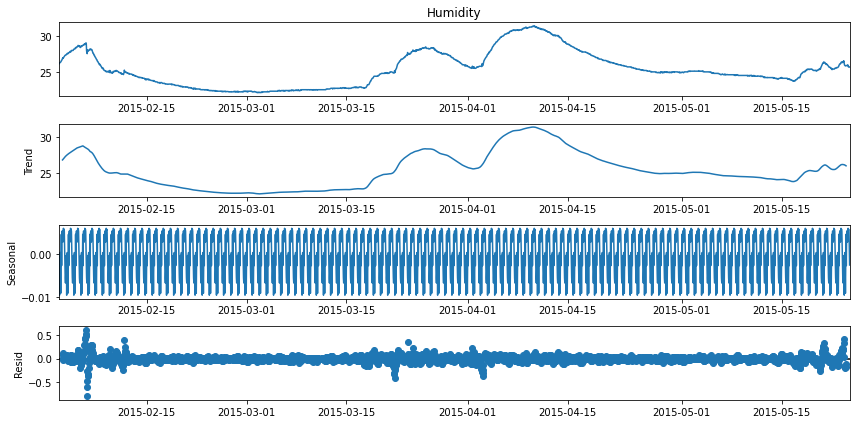

In [27]:
# decomposition: shows the TS have components like (trend, seasonal,
# or residual)
dec = sm.tsa.seasonal_decompose(df['Humidity'])

dec.plot()
plt.show()

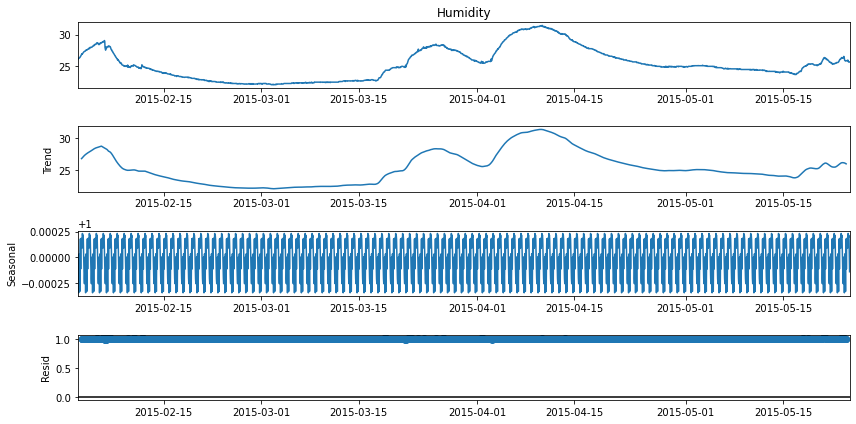

In [29]:
dec = sm.tsa.seasonal_decompose(df['Humidity'], model='multiplicative')

dec.plot()
plt.show()

## Checking for autocorrelation

In [30]:
# we talk aboout serial correlation, it is the correlation of only one 
# variable at two different time (t, t-1)
#most time series have some sort of autocorrelation.
# if it is warm at 3pm, it was also warm at 2pm. 
# autocorrelation is positive. 
# few time series show negative autocorr. (dr visiting patients)
df['Humidity'].autocorr()

0.9997369988034106

In [19]:
# by default the lag is 1, we can specify the lag
df['Humidity'].autocorr(lag=3)

0.9991372065671117

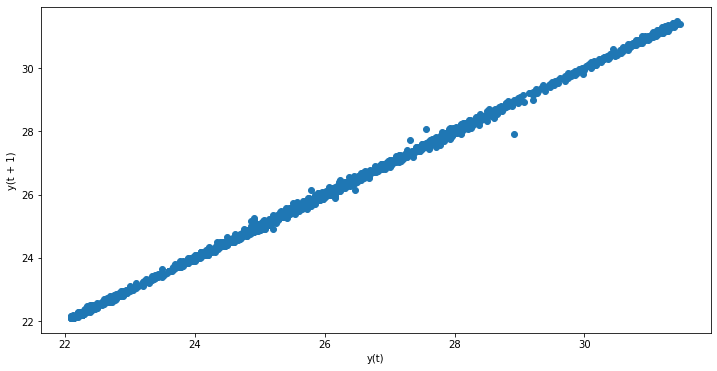

In [20]:
from pandas.plotting import lag_plot
lag_plot(df['Humidity'])

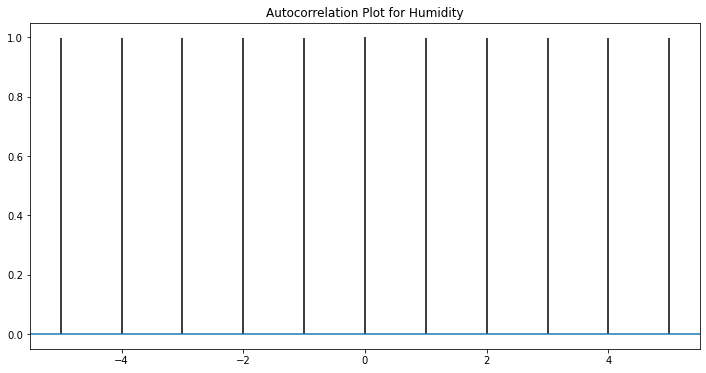

In [21]:
# Autocorrelation Plot

plt.acorr(df['Humidity'], maxlags = 5)
plt.title("Autocorrelation Plot for Humidity")

  
plt.show()  
# this figure shows autocorr at each lag
# this is more or less heatmap of autocorr.
# when autocoor is high, we can make a good forecast.

## Applying Time Series models

In [22]:
# auto regression: 

from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(df['Humidity'], lags = 2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2664
Model:                     AutoReg(2)   Log Likelihood                3898.822
Method:               Conditional MLE   S.D. of innovations              0.056
Date:                Thu, 26 Nov 2020   AIC                             -5.764
Time:                        18:52:40   BIC                             -5.755
Sample:                    02-02-2015   HQIC                            -5.761
                         - 05-24-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0071      0.011      0.629      0.529      -0.015       0.029
Humidity.L1     1.0097      0.019     52.099      0.000       0.972       1.048
Humidity.L2    -0.0100      0.019     -0.517      0.605      -0.048       0.028
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           +0.0000j            1.0003            0.0000
AR.2           99.8636           +0.0000j           99.8636            0.0000
-----------------------------------------------------------------------------
"""

In [23]:
#help(AutoReg)

## Making Predictions

In order to assess the accuracy of our predictions, we will remove the last ten observations from the variable which we are using to train the model. Afterwards, we will then predict those ten observations, and see how close we got with our model to what happened in reality!

In [24]:

train= df.Humidity[:-10] #train is all data minus the last 10 
test= df.Humidity[-10:] # test set is only the last 10 data.


#(train, test) = df.Humidity[:-10], df.Humidity[-10:]

model = AutoReg(df['Humidity'], lags = 1).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2664
Model:                     AutoReg(1)   Log Likelihood                3900.599
Method:               Conditional MLE   S.D. of innovations              0.056
Date:                Thu, 26 Nov 2020   AIC                             -5.765
Time:                        18:52:42   BIC                             -5.758
Sample:                    02-02-2015   HQIC                            -5.763
                         - 05-24-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0070      0.011      0.622      0.534      -0.015       0.029
Humidity.L1     0.9997      0.000   2247.761      0.000       0.999       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           +0.0000j            1.0003            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
pred = model.predict(start=len(train), end=len(train)+10)
pred

2015-05-24 04:00:00    25.889624
2015-05-24 05:00:00    25.889624
2015-05-24 06:00:00    25.911618
2015-05-24 07:00:00    25.891291
2015-05-24 08:00:00    25.977599
2015-05-24 09:00:00    25.851635
2015-05-24 10:00:00    25.699679
2015-05-24 11:00:00    25.735668
2015-05-24 12:00:00    25.699679
2015-05-24 13:00:00    25.699679
2015-05-24 14:00:00    25.681351
Freq: H, dtype: float64

In [47]:
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

,Prediction,True Values
0,25.890000,25.889683
1,25.912000,25.889683
2,25.891667,25.911677
3,25.978000,25.891350
4,25.852000,25.977659
5,25.700000,25.851694
6,25.736000,25.699736
7,25.700000,25.735726
8,25.700000,25.699736
9,25.681667,25.699736


### Dickey Fuller Test for Stationarity

In [ ]:
#if a variable is stationary, then its propertise (e.g. mean and variance)
# are stable over time

In [38]:
# it test if the coeff of AR1 is very close to one (AR1=1).
# H0: coeff of AR1 =1 (not stationary) or unit root is present.
#H1: it is stationary
from statsmodels.tsa.stattools import adfuller
#help(adfuller)
adfuller(df.Humidity)

(-2.1499851533319747,
 0.22489577392281013,
 23,
 2640,
 {'1%': -3.4328294203524243,
  '5%': -2.8626354202775866,
  '10%': -2.5673531303087693},
 -7946.348602025413)

In [42]:
# On First Differences

adfuller(df['Humidity_diff'][1:])

(-5.92915694180352,
 2.4035285690791094e-07,
 22,
 2639,
 {'1%': -3.432830360798943,
  '5%': -2.8626358355986774,
  '10%': -2.5673533514279425},
 -7936.868635028)

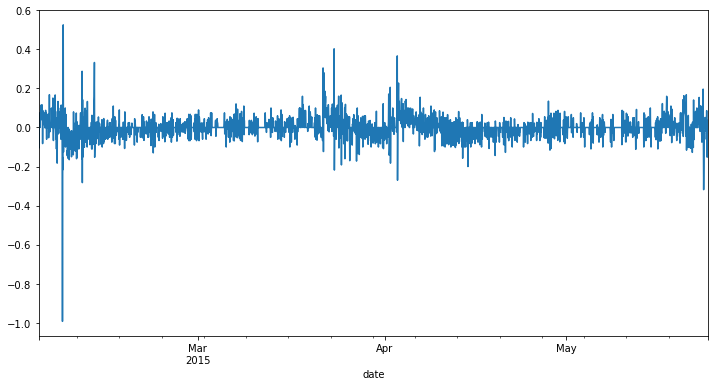

In [43]:
df['Humidity_diff'].plot()
plt.show()

## MA models

In [31]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(df['CO2'], order=(0, 1)).fit()
#print(model.params)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    CO2   No. Observations:                 2664
Model:                     ARMA(0, 1)   Log Likelihood              -17086.161
Method:                       css-mle   S.D. of innovations            147.525
Date:                Thu, 26 Nov 2020   AIC                          34178.323
Time:                        19:04:30   BIC                          34195.985
Sample:                    02-02-2015   HQIC                         34184.714
                         - 05-24-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        717.8751      5.694    126.084      0.000     706.716     729.034
ma.L1.CO2      0.9924      0.002    559.115      0.000       0.989       0.996
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0077           +0.0000j            1.0077            0.5000
-----------------------------------------------------------------------------
"""

In [32]:
(train, test) = df.CO2[:-10], df.CO2[-10:]

model = ARMA(df['CO2'], order=(0, 1)).fit()
pred = model.predict(start=len(train), end=len(train)+10)
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

,Prediction,True Values
0,1153.250000,909.922202
1,1152.400000,959.347917
2,1146.166667,909.455471
3,1145.400000,952.781756
4,1140.800000,909.024939
5,1150.250000,947.883250
6,1129.200000,918.699129
7,1125.800000,926.771241
8,1123.000000,915.386585
9,1124.000000,923.905798


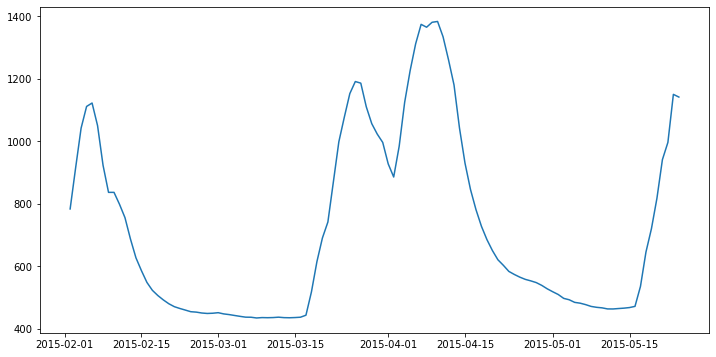

In [34]:
plt.plot(df['CO2'].resample('D').mean())
plt.show()

## ARMA Models

In [36]:
model = ARMA(df['CO2'], order=(2, 1)).fit()
model.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    CO2   No. Observations:                 2664
Model:                     ARMA(2, 1)   Log Likelihood               -8013.658
Method:                       css-mle   S.D. of innovations              4.892
Date:                Thu, 26 Nov 2020   AIC                          16037.317
Time:                        19:17:00   BIC                          16066.755
Sample:                    02-02-2015   HQIC                         16047.970
                         - 05-24-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        681.8453     79.594      8.567      0.000     525.845     837.846
ar.L1.CO2      1.9905      0.001   3127.486      0.000       1.989       1.992
ar.L2.CO2     -0.9906      0.001  -1557.457      0.000      -0.992      -0.989
ma.L1.CO2     -0.9324      0.007   -137.335      0.000      -0.946      -0.919
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0047           -0.0076j            1.0047           -0.0012
AR.2            1.0047           +0.0076j            1.0047            0.0012
MA.1            1.0725           +0.0000j            1.0725            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# the stability condition has not (in the AR model)
# invertability condition was not met (in the MA model)
# the absolute value of the coeff of beta and tetha should be less than one.

In [37]:
pred = model.predict(start=len(train), end=len(train)+10)
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

,Prediction,True Values
0,1153.250000,1153.100008
1,1152.400000,1153.815913
2,1146.166667,1152.841089
3,1145.400000,1146.178615
4,1140.800000,1145.329978
5,1150.250000,1140.430858
6,1129.200000,1150.418761
7,1125.800000,1128.097215
8,1123.000000,1124.538928
9,1124.000000,1121.626476


## Extra Pointer

For those who are especially interested in time series:

There is a further class of models called ARIMA models - this stands for Autoregressive Integrated Moving Average

The 'integrated' here refers to the number of times needed to difference a series in order to achieve stationarity.
So an ARMA model is equivalent to an ARIMA model of the same MA and AR orders with no differencing.

ARMA(p,q) is equivalent to ARIMA(p,0,q)


In [44]:
# Example:

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Humidity'] ,order=(1,1,5)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Humidity   No. Observations:                 2662
Model:                 ARIMA(1, 1, 5)   Log Likelihood                4021.107
Method:                       css-mle   S.D. of innovations              0.053
Date:                Thu, 26 Nov 2020   AIC                          -8026.213
Time:                        19:49:57   BIC                          -7979.118
Sample:                    02-02-2015   HQIC                         -8009.170
                         - 05-24-2015                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0001      0.004     -0.030      0.976      -0.007       0.007
ar.L1.D.Humidity     0.9766      0.008    124.101      0.000       0.961       0.992
ma.L1.D.Humidity    -1.0496      0.021    -49.345      0.000      -1.091      -1.008
ma.L2.D.Humidity     0.1175      0.028      4.178      0.000       0.062       0.173
ma.L3.D.Humidity    -0.0430      0.029     -1.486      0.137      -0.100       0.014
ma.L4.D.Humidity     0.1117      0.028      3.931      0.000       0.056       0.167
ma.L5.D.Humidity    -0.0508      0.020     -2.497      0.013      -0.091      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0240           +0.0000j            1.0240            0.0000
MA.1            1.1167           -0.0000j            1.1167           -0.0000
MA.2           -1.2356           -1.5418j            1.9758           -0.3575
MA.3           -1.2356           +1.5418j            1.9758            0.3575
MA.4            1.7763           -1.1656j            2.1246           -0.0924
MA.5            1.7763           +1.1656j            2.1246            0.0924
-----------------------------------------------------------------------------
"""